### IMPORTANDO LIBRERIAS

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### IMPORTANDO DATOS

In [3]:
currencies = pd.read_csv('/Users/santiagosalazar/Documents/Learn/Platzi/Analisis de datos con python/Kaggle-example/currency_exchange_rates.csv')
currencies.head(3)

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,CNY,IDR,MYR,PHP,THB,RON,BRL,MXN,INR,ILS
0,2000-01-03,0.991080,1.0,101.833499,0.571556,35.741328,7.374034,15.507037,0.619029,252.259663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.970403,1.0,102.746240,0.560408,35.196507,7.222610,15.183503,0.610966,246.986900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.964506,1.0,103.530093,0.557292,35.047261,7.180170,15.091242,0.609954,245.476466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CONOCIENDO LOS TIPOS DE DATOS

In [4]:
currencies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8399 non-null   object 
 1   EUR     8399 non-null   float64
 2   USD     8399 non-null   float64
 3   JPY     8399 non-null   float64
 4   CYP     2921 non-null   float64
 5   CZK     8399 non-null   float64
 6   DKK     8399 non-null   float64
 7   EEK     4018 non-null   float64
 8   GBP     8399 non-null   float64
 9   HUF     8399 non-null   float64
 10  LTL     5478 non-null   float64
 11  LVL     5113 non-null   float64
 12  MTL     2921 non-null   float64
 13  PLN     8399 non-null   float64
 14  ROL     2006 non-null   float64
 15  SEK     8399 non-null   float64
 16  SIT     2556 non-null   float64
 17  SKK     3287 non-null   float64
 18  CHF     8399 non-null   float64
 19  ISK     5059 non-null   float64
 20  NOK     8399 non-null   float64
 21  TRL     1827 non-null   float64
 22  

### CAMBIANDO TIPO DE DATO DATE

In [32]:
currencies.dtypes

Date     object
EUR     float64
JPY     float64
GBP     float64
CHF     float64
dtype: object

In [35]:
currencies['Date']= pd.to_datetime(currencies['Date'])

In [37]:
currencies.dtypes

Date    datetime64[ns]
EUR            float64
JPY            float64
GBP            float64
CHF            float64
dtype: object

### ELIGIENDO VARIABLES A ANALIZAR

In [47]:
currencies = pd.DataFrame(currencies, columns=['Date','EUR','GBP','CHF'])
currencies.head(5)

,Date,EUR,GBP,CHF
0,2000-01-03,0.991080,0.619029,1.589990
1,2000-01-04,0.970403,0.610966,1.557787
2,2000-01-05,0.964506,0.609954,1.548997
3,2000-01-06,0.962649,0.606662,1.546785
4,2000-01-07,0.972384,0.608907,1.563497


### UNA REVISION DESCRIPTIVA BREVE

In [54]:
list = ['Date']
currencies.describe(include=np.float64)

,EUR,GBP,CHF
count,8399.000000,8399.000000,8399.000000
mean,0.850329,0.658011,1.122300
std,0.120803,0.090631,0.243094
min,0.625391,0.474737,0.727431
25%,0.759330,0.602880,0.949871
50%,0.834516,0.646627,1.001854
75%,0.906290,0.725686,1.245562
max,1.211827,0.943732,1.828405


### REVISANDO CORRELACIONES

In [56]:
currencies.corr(numeric_only=True)

,EUR,GBP,CHF
EUR,1.000000,0.515176,0.651683
GBP,0.515176,1.000000,-0.212382
CHF,0.651683,-0.212382,1.000000


### VISUALMENTE...

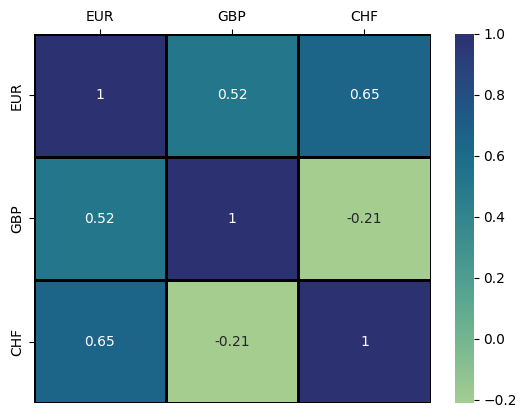

In [57]:
ax=sns.heatmap(currencies.corr(numeric_only=True),cmap='crest', annot=True, linewidths= 1, 
            linecolor='0', cbar=True, xticklabels=True, yticklabels=True)
ax.set(xlabel='',ylabel='')
ax.xaxis.tick_top()

### FINALMENTE GRAFIQUEMOS UN POCO

<Axes: title={'center': 'USD TO EUR, GBP & CHF SINCE 2018'}, xlabel='Date', ylabel='Conversion rate'>

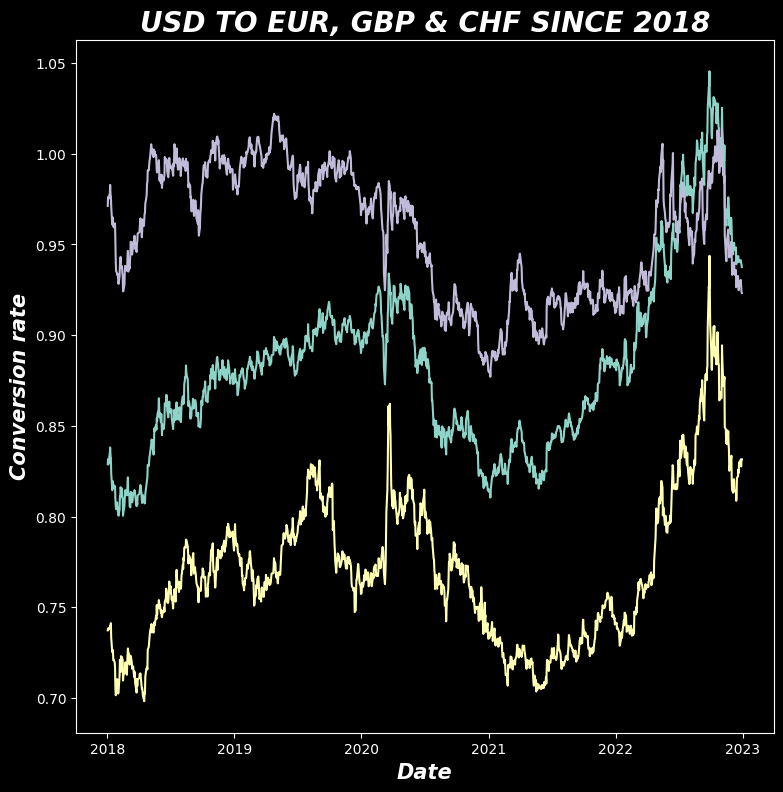

In [83]:
plt.style.use('dark_background')
fig, curr, = plt.subplots(figsize = (9,9))
curr.set_title('USD TO EUR, GBP & CHF SINCE 2018', fontsize = 20, style= 'italic', weight='bold')
curr.set_ylabel('Conversion rate', fontsize = 15, style= 'italic', weight='bold')
curr.set_xlabel('Date', fontsize = 15, style= 'italic', weight='bold')
currencies_5years = currencies[(currencies['Date'] >= '2018-01-01')]
sns.lineplot(data=currencies_5years, x='Date', y='EUR')
sns.lineplot(data=currencies_5years, x='Date', y='GBP')
sns.lineplot(data=currencies_5years, x='Date', y='CHF')
